# 20

In [205]:
array = []
start = None
end = None 

with open("test_input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


        


Start: (3, 1)
End: (7, 5)


In [206]:
from heapq import heappush, heappop

# Run Dijkstra from both sides?  

def dijkstra(array, start, end, steps = -1): 
    # Use heap for this as (score, node) pairs. 
    start = start
    current = [(0, start)] 

    MAX_DISTANCE = len(array) * len(array[0]) + 1

    # Store the distances here. 
    distances = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]
    distances[start[0]][start[1]] = 0

    # Dijsktras algorithm.
    while len(current) > 0 and steps != 0: 
        distance, node = heappop(current)

        #if node == end:
        #    print(f"Found end in {distance} steps")
        #    break # BREAK EARLY


        # Insert new neighbor
        neighbors = [(node[0] + 1, node[1]), 
                    (node[0] - 1, node[1]), 
                    (node[0], node[1] + 1), 
                    (node[0], node[1] - 1)] # R -> rotat
        
        for neighbor in neighbors:

            # Out of bounds
            if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
                continue

            # Wall
            if array[neighbor[0]][neighbor[1]] == "#":
                continue

            cost = 1
        
            # Add new path
            if distance + cost < distances[neighbor[0]][neighbor[1]]:
                distances[neighbor[0]][neighbor[1]] = distance + cost
                heappush(current, (distance + cost, neighbor))

        # Limit execution
        if steps != -1: 
            steps -= 1

    # for printing
    for row in range(len(array)):
        for col in range(len(array[0])):
            if distances[row][col] == MAX_DISTANCE:
                distances[row][col] = -1
    return distances

In [207]:
distances = dijkstra(array, start, end, -1)   

(-0.5, 14.5, 14.5, -0.5)

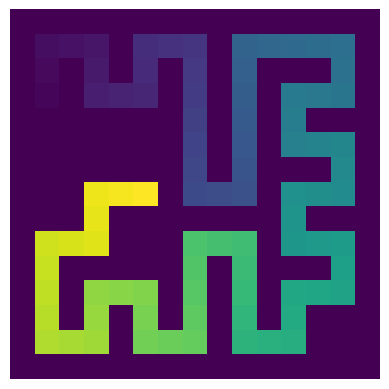

In [208]:
import matplotlib.pyplot as plt

plt.imshow(distances)
plt.axis("off")

In [209]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

In [350]:
distance_to_end = distances[end[0]][end[1]]

cheats = dict() 

for row in range(len(distances)):
    for col in range(len(distances)):
        # vertical_cheat
        if row + 2 < len(distances):
            if distances[row][col] >= 0 and distances[row+1][col] == -1 and distances[row+2][col] >= 0:
                savings = abs(distances[row][col] - distances[row+2][col]) - 2

                # does it really help? 

                if max(distances[row][col], distances[row+2][col]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row+1][col] = 0.5
                    cheat_dist[row+2][col] = 0


        # horizontal_cheat
        if col + 2 < len(distances[0]):
            if distances[row][col] >= 0 and distances[row][col+1] == -1 and distances[row][col+2] >= 0:
                savings = abs(distances[row][col] - distances[row][col+2]) - 2

                if max(distances[row][col], distances[row][col+2]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row][col+1] = 0.5
                    cheat_dist[row][col+2] = 0




(-0.5, 14.5, 14.5, -0.5)

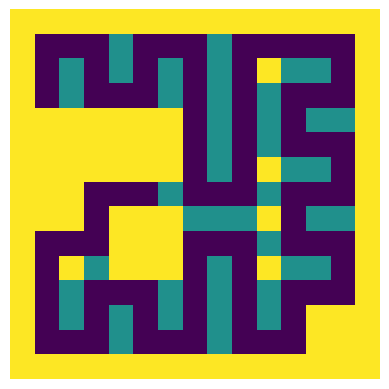

In [351]:
# Cheating plan :D 
plt.imshow(cheat_dist, cmap="viridis")
plt.axis("off")

In [352]:
result = 0 # number of cheats that save at least 100.

for savings, number_of_cheats in cheats.items():
    if savings >= 100:
        result += number_of_cheats

result

0

# Part 2 

In [365]:
array = []
start = None
end = None 

with open("input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


Start: (61, 55)
End: (67, 33)


In [366]:
distances = dijkstra(array, start, end, -1)

(-0.5, 140.5, 140.5, -0.5)

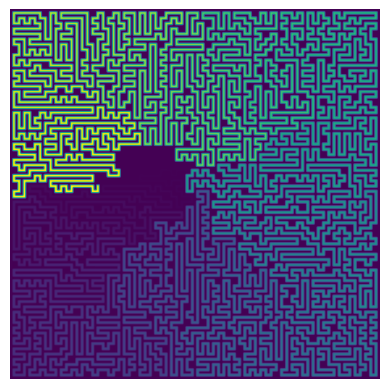

In [367]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(distances))
plt.axis("off")

In [368]:
distances

[[-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [-1,
  8394,
  8393,
  8392,
  8391,
  8390,
  8389,
  8388,
  8387,
  8386,
  8385,
  8384,
  -1,
  -1,
  -1,
  8360,
  8359,
  8358,
  -1,
  8212,
  8

(-0.5, 140.5, 140.5, -0.5)

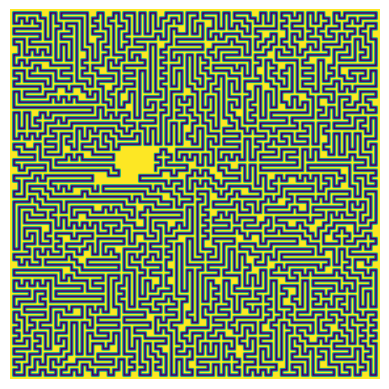

In [369]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

plt.imshow(cheat_dist)
plt.axis("off")

In [370]:
distance_to_end = distances[end[0]][end[1]]
cheats = dict() 
radius = 20

for row in range(len(distances)):
    for col in range(len(distances)):
        
        for r in range(-radius, radius+1): 
            for c in range(-radius + r, radius - r+1):
                if abs(r) + abs(c) <= radius:
                    if 0 <= row + r < len(distances) and 0 <= col + c < len(distances[0]):
                        if distances[row][col] >= 0 and distances[row+r][col+c] >= 0:
                            savings = distances[row][col] - distances[row+r][col+c] - abs(r) - abs(c)

                            if savings > 0:
                                cheats[savings] = cheats.get(savings, 0) + 1


In [371]:
cheats # weird 

{20: 23258,
 164: 7130,
 18: 11926,
 162: 4025,
 16: 25394,
 160: 6769,
 14: 12800,
 12: 28047,
 10: 13733,
 8: 30370,
 158: 4190,
 6: 14882,
 156: 7865,
 24: 20652,
 4: 40736,
 154: 4333,
 22: 11123,
 2: 16821,
 152: 7739,
 76: 12595,
 150: 4535,
 74: 6713,
 148: 7845,
 72: 12222,
 64: 13721,
 146: 4562,
 70: 6870,
 62: 7534,
 144: 8521,
 68: 13436,
 60: 13475,
 142: 4687,
 66: 7325,
 58: 7806,
 140: 8083,
 56: 13435,
 36: 17474,
 192: 6409,
 190: 3487,
 138: 4689,
 136: 8438,
 134: 4824,
 132: 8379,
 130: 4836,
 128: 9062,
 126: 4946,
 124: 8491,
 188: 5969,
 122: 4986,
 186: 3524,
 120: 9606,
 184: 5895,
 54: 7915,
 118: 5205,
 52: 14432,
 50: 8284,
 48: 15536,
 116: 9722,
 46: 8634,
 114: 5377,
 44: 14963,
 112: 10175,
 42: 8934,
 40: 16935,
 38: 9365,
 34: 9806,
 32: 19210,
 30: 10306,
 28: 18663,
 182: 3531,
 110: 5466,
 26: 10550,
 180: 6409,
 176: 6823,
 108: 8850,
 172: 7087,
 174: 3811,
 170: 3938,
 168: 6823,
 166: 3946,
 216: 5544,
 214: 3201,
 212: 5671,
 210: 3255,
 208: 

In [372]:
result = 0

for saving, number in cheats.items():
    if saving >= 100:
       result += number

result

993178

(-0.5, 20.5, 20.5, -0.5)

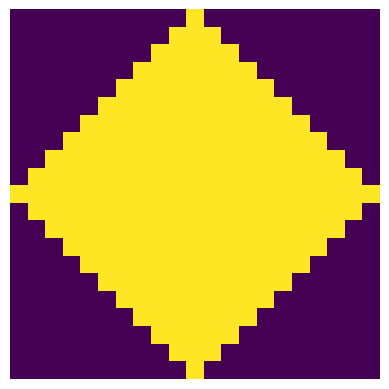

In [373]:
radius = 10

test = np.zeros((2*radius+1,2*radius+1))

for r in range(-radius,radius+1): 
    for c in range(-radius+r, radius-r+1):
        
        if abs(r) + abs(c) <= radius:
            test[r+radius][c+radius] = 1

            

plt.imshow(test)
plt.axis("off")